In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('ccd_properties_clean.csv')

In [3]:
df.dropna(inplace=True)
df.head()

,CHEM_COMP_ID,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
0,ZZZ,195.181,-2.5272,7.0,4.0,1.3220,2.0
1,ZZY,346.322,-0.7625,9.0,1.0,-5.2566,3.0
2,ZZX,461.880,1.5847,9.0,2.0,8.4262,4.0
3,ZZW,335.337,2.6308,5.0,2.0,0.7300,4.0
4,ZZV,415.444,1.2663,7.0,1.0,5.4555,4.0


In [4]:
df.describe()

,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
count,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000
mean,366.619527,0.472065,7.132675,2.935142,-6.164656,2.657093
std,180.240081,3.937499,4.650156,2.332769,12.247612,2.405147
min,12.011000,-27.439000,0.000000,0.000000,-125.430000,0.000000
25%,237.854500,-1.545200,4.000000,1.000000,-9.475900,1.000000
50%,347.223000,1.208200,6.000000,2.000000,-2.066700,3.000000
75%,457.471500,2.989500,9.000000,4.000000,1.406050,4.000000
max,2141.460000,22.457000,59.000000,40.000000,17.076000,91.000000


In [5]:
kmeans = KMeans(n_clusters = 2)
cust2  = df[['Rings', 'Druglikeness']]

kmeans.fit(cust2)

cluster_assignment = kmeans.predict(cust2)

In [6]:
def pairplot_cluster(df, cols, cluster_assignment):
    """
    df: dataframe that contains the data to plot 
    cols: columns to consider for the plot
    cluster_assignments: cluster asignment returned by the clustering algorithm
    """
    # seaborn will color the samples according to the column cluster
    df['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    df.drop('cluster', axis=1, inplace=True)

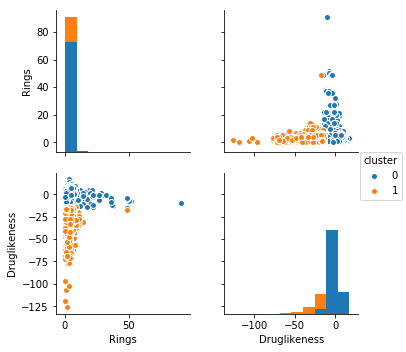

In [7]:
pairplot_cluster(df, 
                 ['Rings', 'Druglikeness'],                  cluster_assignment)

In [8]:
df_numeric = df.drop(columns=['CHEM_COMP_ID'])
df_numeric.head()

,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
0,195.181,-2.5272,7.0,4.0,1.3220,2.0
1,346.322,-0.7625,9.0,1.0,-5.2566,3.0
2,461.880,1.5847,9.0,2.0,8.4262,4.0
3,335.337,2.6308,5.0,2.0,0.7300,4.0
4,415.444,1.2663,7.0,1.0,5.4555,4.0


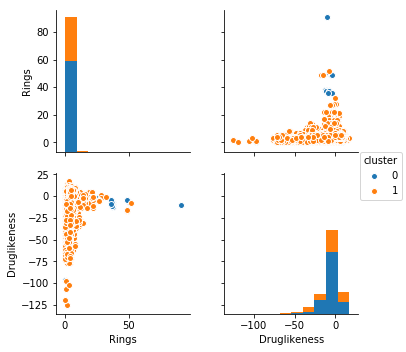

In [9]:
kmeans.fit(df_numeric)
cluster_assignment = kmeans.predict(df_numeric)

# Visualise the clusters using pairplot_cluster()
pairplot_cluster(df_numeric, 
                 ['Rings', 'Druglikeness'], 
                 cluster_assignment)